In [48]:
import pandas as pd
import datetime

In [49]:
df = pd.read_csv("Serie_FSH005.csv",delimiter=";")

In [50]:
df.head()

,DESDE,COTIZACION
0,13/9/2013 00:00,0.00
1,19/9/2013 00:00,5.76
2,20/9/2013 00:00,5.76
3,24/9/2013 00:00,5.84
4,25/9/2013 00:00,5.84


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DESDE       1534 non-null   object 
 1   COTIZACION  1534 non-null   float64
dtypes: float64(1), object(1)
memory usage: 24.1+ KB


##### Generación de Date Time a través de lambda

In [52]:
#df['DataTime'] = datetime.datetime.strptime(df.DESDE, '%D/%M/%Y %H-%m-%d')
df['DataTime'] = df.DESDE.apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y %H:%M'))

##### Generación de indice con campo de DataFrame

In [53]:
df.index = df.DataTime

In [54]:
df.head()

,DESDE,COTIZACION,DataTime
DataTime,,,
2013-09-13,13/9/2013 00:00,0.00,2013-09-13
2013-09-19,19/9/2013 00:00,5.76,2013-09-19
2013-09-20,20/9/2013 00:00,5.76,2013-09-20
2013-09-24,24/9/2013 00:00,5.84,2013-09-24
2013-09-25,25/9/2013 00:00,5.84,2013-09-25


In [62]:
df.drop(columns = ['DataTime','DESDE'], inplace = True)

KeyError: "['DataTime' 'DESDE'] not found in axis"

In [58]:
df.interpolate()

,COTIZACION
DataTime,
2013-09-13,0.00
2013-09-19,5.76
2013-09-20,5.76
2013-09-24,5.84
2013-09-25,5.84
...,...
2020-10-21,77.71
2020-10-22,78.05
2020-10-23,78.09


In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [59]:
result = seasonal_decompose(df.COTIZACION, model='additive', freq=365)

<ipython-input-59-c155688bea2d>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(df.COTIZACION, model='additive', freq=365)


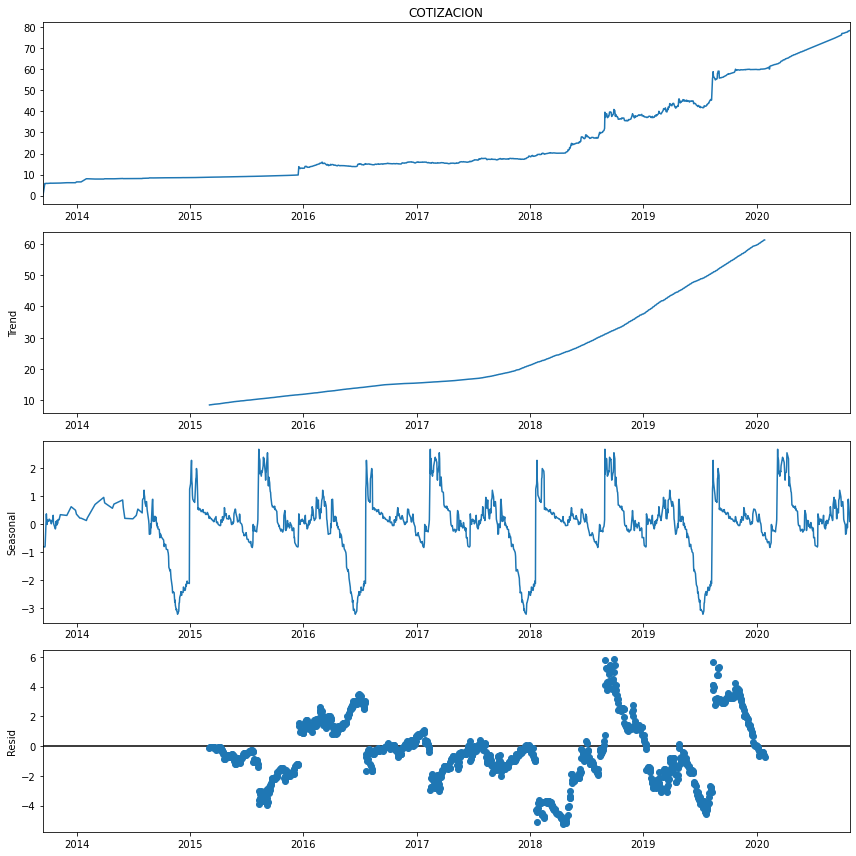

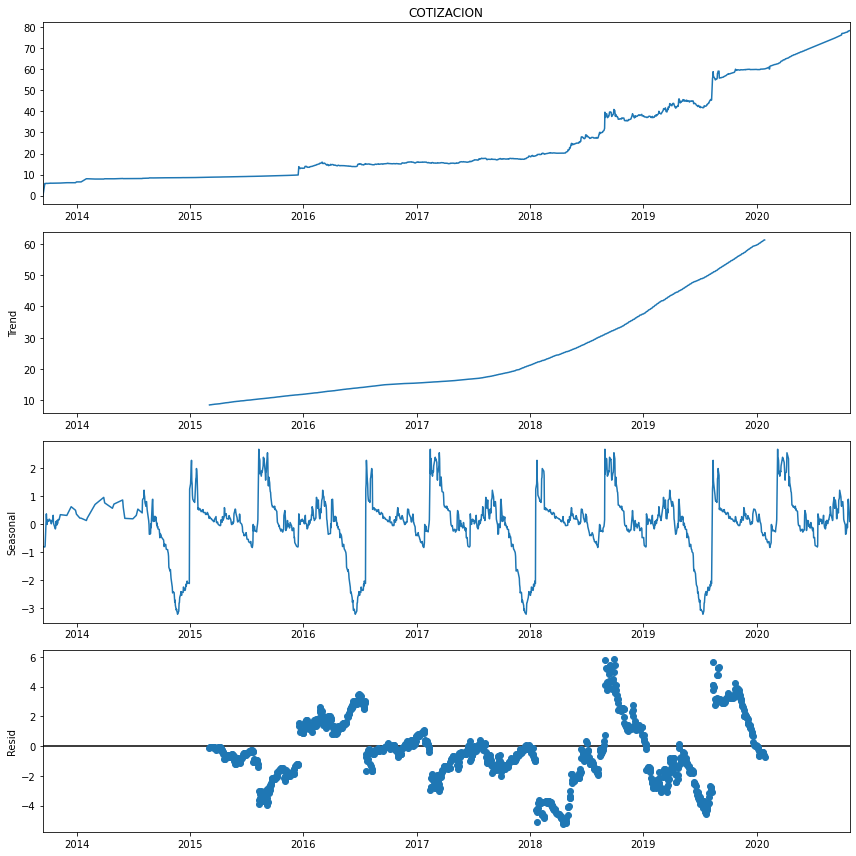

In [61]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()